In [ ]:
# import libraries
import pandas as pd
import numpy as np
import zipfile
import os
from os import path
import pyodbc
from datetime import datetime
import yfinance as yf

# visual packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

clr1 = ["#00ab4e","#58595b","#939598","#000000","#FFFFFF"]
clr2 = ["#00ab4e","#b1b3b6","#009697","#8dc63f",'#00b5f1','#f7941d','#96157c','#fabfb7','#ee2f53',
       '#b6e4fa','#0066b3','#ffd000','#58595b','#8dc0c4','#c84723','#c4df9b','#103c68','#8f7890',
        '#ffe694','#265b3f','#fbb161','#4b254c']

In [ ]:
dir_wd = path.join(os.environ["OneDrive"],r'ResearchSignals\Projects\20220314_DrawdownFunction')

## Load the file

In [ ]:
df_p = pd.read_csv(path.join(dir_wd,'Nasdaq_index_pricing.csv'), parse_dates=['Date'])

In [ ]:
# df_p['Date'] = pd.to_datetime(df_p['Date'])

In [ ]:
df_p.tail()

In [ ]:
df_p.shape

## Test the drawdown logic

__Data Preparing__: it needs Date + Price, first need to order by Date

__Logic Statement__: 
- for each day/row, look back a specified period of time (also can allow a lookback parameter, default being max), get the max price as the base
- Calculate the DD as current day price/last max price - 1



In [ ]:
# test
df_p['RunningPeak'] = df_p['Adj Close'].cummax()
df_p['Drawdown'] = df_p['Adj Close']/df_p['RunningPeak'] - 1

#### Line Chart of Rolling Drawdown

In [ ]:
fig = plt.figure(figsize = (12, 4))

plt.plot(df_p['Date'], df_p['Drawdown'], linestyle="-", color=clr2[0])

plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Rolling Drawdown of Nasdaq Index')
plt.show()

#### Histogram of Drawdown

In [ ]:
fig = plt.figure(figsize = (12, 4))

# the histogram of the data
n, bins, patches = plt.hist(df_p['Drawdown'], 50, density=False, facecolor=clr2[0], alpha=0.75)

plt.xlabel('Drawdown')
plt.ylabel('Occurance')
plt.title('Histogram of Drawdown')
plt.show()

In [ ]:
def dd(ser):
    # only compare each point to the previous running peak
    running_max = ser.cummax()
    cur_dd = ser/running_max - 1
    return cur_dd

## Adding YFinance pricing pull

In [ ]:
# pull pricing data function

s_symbol = 'NTES'

df_SData = yf.download(
    tickers = s_symbol,
    period = 'max',
    auto_adjust=False 
)

In [ ]:
df_SData.head()

In [ ]:
df_SData['Adj Close']

In [ ]:
df_dd = dd(df_SData['Adj Close'])

In [ ]:
fig = plt.figure(figsize = (12, 4))

plt.plot(df_dd, linestyle="-", color=clr2[0])

plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.title('Rolling Drawdown')
plt.show()

In [1]:
# plotly
fig = px.line(df_dd, color_discrete_sequence=clr2,
              labels={'value': 'Drawdown'},
              title = f'Cumulative Return by Decile'
)
fig.show()


NameError: name 'px' is not defined

## Functionize it

In [8]:
def plot_dd(s_symbol):
    import yfinance as yf
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import plotly.express as px
    clr2 = ["#00ab4e","#b1b3b6","#009697","#8dc63f",'#00b5f1','#f7941d','#96157c','#fabfb7','#ee2f53',
            '#b6e4fa','#0066b3','#ffd000','#58595b','#8dc0c4','#c84723','#c4df9b','#103c68','#8f7890',
            '#ffe694','#265b3f','#fbb161','#4b254c']
    
    ### load pricing data
    df_SData = yf.download(
        tickers = s_symbol,
        period = 'max',
        auto_adjust=False 
    )
    
    ### calculate drawdown
    def dd(ser):
        running_max = ser.cummax()
        cur_dd = ser/running_max - 1
        return cur_dd
    
    df_dd = dd(df_SData['Adj Close'])
    
    ### plot drawdown
    fig1 = plt.figure(figsize = (12, 4))
    plt.plot(df_dd, linestyle="-", color=clr2[0])
    plt.xlabel('Date')
    plt.ylabel('Drawdown')
    plt.title(f'Rolling Drawdown of {s_symbol}')
    plt.show()
    
    fig2 = px.line(df_dd, color_discrete_sequence=clr2,
                  labels={'value': 'Drawdown'},
                  title = f'Rolling Drawdown of {s_symbol}'
                 )
    fig2.show()

[*********************100%***********************]  1 of 1 completed


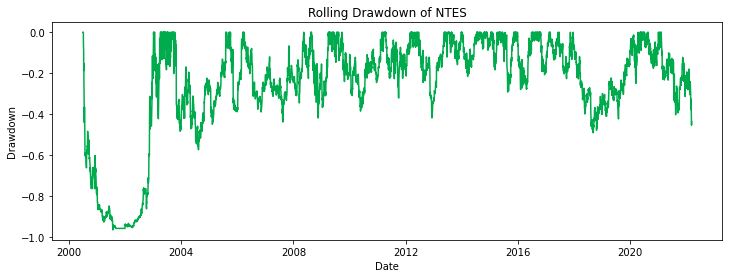

In [9]:
plot_dd('NTES')